In [2]:
import numpy as np
import scipy as sp
from numpy.random import pareto
import matplotlib.pyplot as plt
import pandas as pd
import pystan
from scipy.stats import gamma, expon, dirichlet, beta, uniform

In [4]:
b = 1
K = 1

y = np.array([1.36, 7.47, 7.31, 7.48, 10.33])
x = np.linspace(0, 30, 10000)

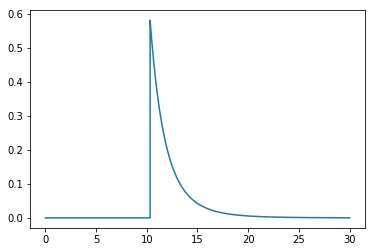

MAP estimate is 10.33. The mean is 12.40


In [87]:
pdf = sp.stats.pareto.pdf(x, b=K + len(y), scale=np.max(np.concatenate([y, [b]]))) 
plt.plot(x, pdf)
plt.show()
t_hat = x[np.argmax(pdf)]
p_mean = (K + len(y)) * np.max(np.concatenate([y, [b]])) / (K + len(y) - 1)
print('MAP estimate is %.2f. The mean is %.2f' % (t_hat, p_mean))

CDF that y < 5 = 0.48, probability that y > 11 = 0.00


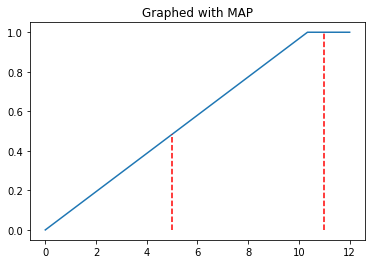

In [95]:
x = np.linspace(0, 12, 10000)
plt.plot(x, uniform.cdf(x, 0, t_hat))

plt.plot([5, 5], np.concatenate([[0], uniform.cdf([5], 0, t_hat)]), linestyle='dashed', color='red')
plt.plot([11, 11], np.concatenate([[0], uniform.cdf([11], 0, t_hat)]), linestyle='dashed', color='red')

vals = uniform.cdf([5, 11], 0, t_hat) - [0, 1]
plt.title('Graphed with MAP')
print('CDF that y < 5 = %.2f, probability that y > 11 = %.2f' % (vals[0], vals[1]))

plt.show()

Probability that y < 5 = 0.40, probability that y > 11 = 0.11


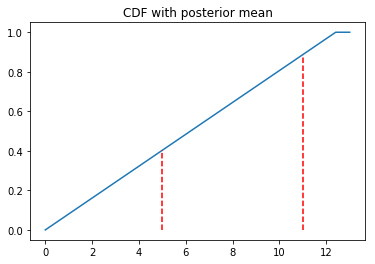

In [121]:
x = np.linspace(0, 13, 10000)
plt.plot(x, uniform.cdf(x, 0, p_mean))

plt.plot([5, 5], np.concatenate([[0], uniform.cdf([5], 0, p_mean)]), linestyle='dashed', color='red')
plt.plot([11, 11], np.concatenate([[0], uniform.cdf([11], 0, p_mean)]), linestyle='dashed', color='red')

vals = np.abs(uniform.cdf([5, 11], 0, p_mean) - [0, 1])
print('Probability that y < 5 = %.2f, probability that y > 11 = %.2f' % (vals[0], vals[1]))
plt.title('CDF with posterior mean')

plt.show()

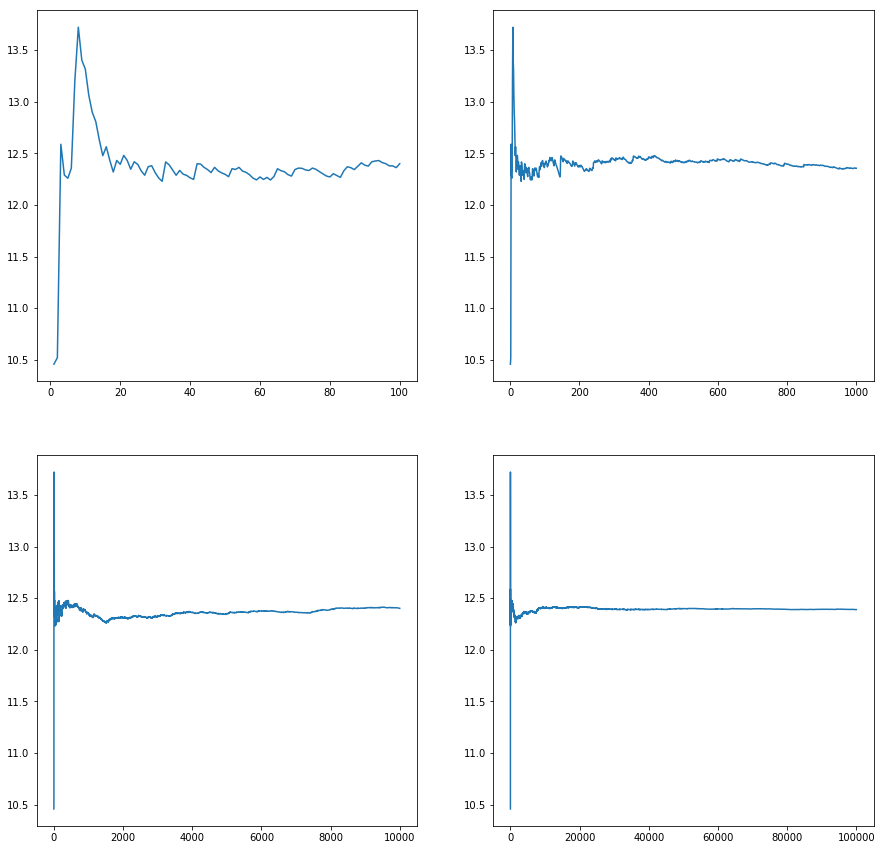

In [168]:
plt.figure(figsize=(200, 200))
def plotPareto(K, b, N = 100000):
    seq = (pareto(K, N) + 1) * b
    means = np.cumsum(seq) / np.arange(1, len(seq) + 1)
    p, ax = plt.subplots(2,2, figsize=(15, 15))
    ax[0, 0].plot(np.arange(1, 101), means[:100])
    ax[0, 1].plot(np.arange(1, 1001), means[:1000])
    ax[1, 0].plot(np.arange(1, 10001), means[:10000])
    ax[1, 1].plot(np.arange(1, 100001), means[:100000])
    
    plt.show()
    
    return np.array([np.mean((pareto(K, N) + 1) * b) for v in range(10)]).reshape(10)

means1 = (plotPareto(1 + len(y), 10.33, 10**5))

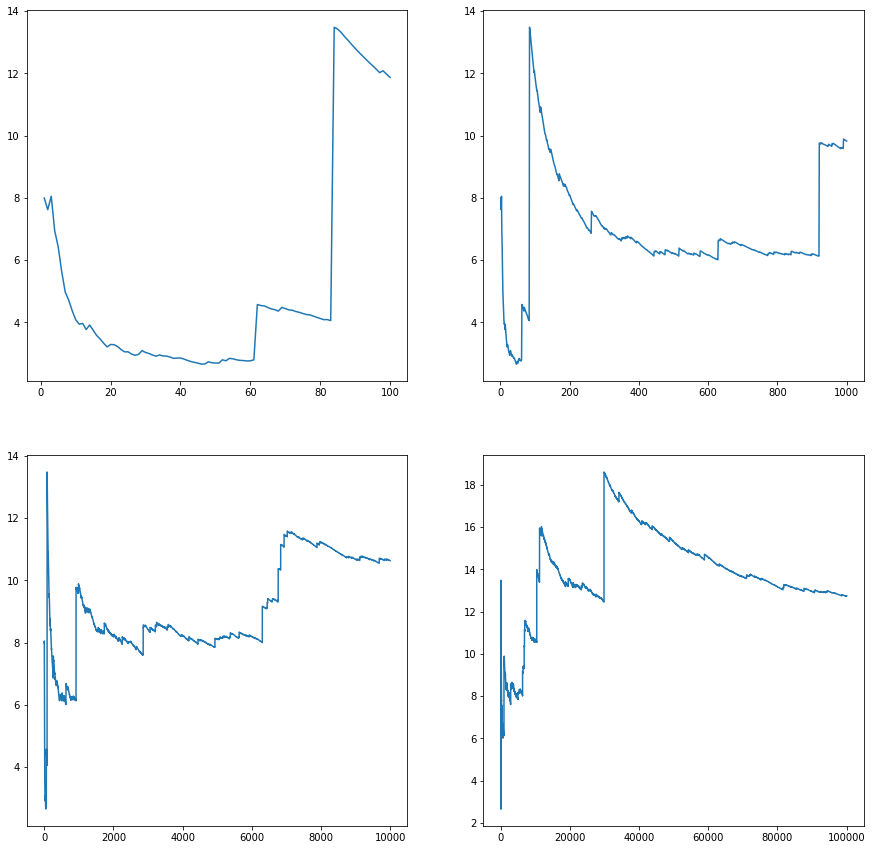

In [169]:
means2 = plotPareto(1, 1, 10**5)

In [170]:
pd.DataFrame({'Posterior': means1, 'Prior': means2})

,Posterior,Prior
0,12.405747,11.310031
1,12.398086,20.398215
2,12.396717,10.432285
3,12.395757,13.036565
4,12.384896,86.322017
5,12.398673,19.832502
6,12.395748,11.110968
7,12.398527,11.236395
8,12.404030,12.819981
9,12.399529,17.461118


In [1]:
wait = """
data {
    int<lower=0> n;
    real<lower=0> y[n];
}
parameters {
    real<lower=0> theta;
}
model {
    theta ~ pareto(1, 1);
    y ~ uniform(0, theta);
}
"""

In [6]:
data = {
    'n': len(y),
    'y': y,
}
